In [18]:
import pandas as pd

In [19]:
recs = pd.read_csv('_Food+Price+data_WFP_2020Dec23_Senegal_FoodPricesData.csv')
prices = pd.read_csv('Crop_recommendation.csv')
soil = pd.read_csv('srdb-data.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_19752\1280618426.py:3: DtypeWarning: Columns (4,47) have mixed types. Specify dtype option on import or set low_memory=False.
  soil = pd.read_csv('srdb-data.csv')


In [20]:
recs = recs[['Commodity','Year','Month','Price']]
recs = recs[recs['Year'] > 2015]
recs['Year'] = recs['Year'].replace({2016: 2020, 2017: 2021, 2018: 2022, 2019: 2023, 2020: 2024, 2021: 2025})
recs['Month'] = recs['Month'].replace({
    1: 'January', 
    2: 'February', 
    3: 'March', 
    4: 'April', 
    5: 'May', 
    6: 'June', 
    7: 'July', 
    8: 'August', 
    9: 'September', 
    10: 'October', 
    11: 'November', 
    12: 'December'
})

commodity_mapping = {
    'Maize (local)': 'Maize',
    'Rice (imported)': 'Rice',
    'Maize (imported)': 'Wheat',
    'Rice (local)': 'Pulses',
}
recs['Commodity'] = recs['Commodity'].replace(commodity_mapping)

manipulation_factors = {
    'Maize': 10.1,
    'Millet': 13.2,
    'Rice': 8,
    'Wheat': 11.5,
    'Pulses': 26.4,
}
recs['Price'] = pd.to_numeric(recs['Price'], errors='coerce')

for commodity, factor in manipulation_factors.items():
    recs.loc[recs['Commodity'] == commodity, 'Price'] *= factor

recs.rename(columns={'Price': 'Price per Quintal'}, inplace=True)

recs

,Commodity,Year,Month,Price per Quintal
108,Maize,2020,January,2272.500
109,Maize,2020,February,2020.000
110,Maize,2020,March,2141.200
111,Maize,2020,April,2141.200
112,Maize,2020,May,2525.000
...,...,...,...,...
20617,Pulses,2025,January,7568.616
20618,Pulses,2025,February,7548.552
20619,Pulses,2025,March,7529.544
20620,Pulses,2025,April,7511.328


C:\Users\HP\AppData\Local\Temp\ipykernel_19752\1314607132.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_data['Date'] = pd.to_datetime(commodity_data['Year'].astype(str) + '-' + commodity_data['Month'].astype(str), format='%Y-%B')


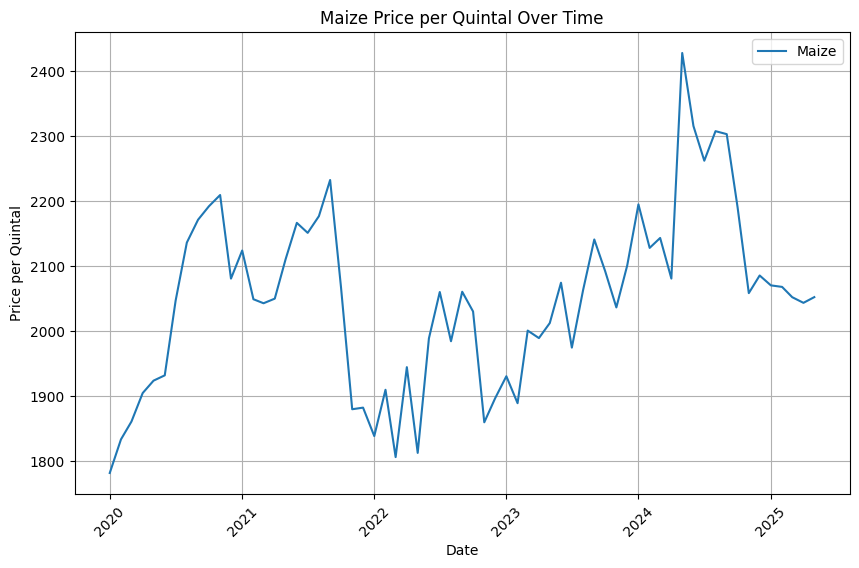

C:\Users\HP\AppData\Local\Temp\ipykernel_19752\1314607132.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_data['Date'] = pd.to_datetime(commodity_data['Year'].astype(str) + '-' + commodity_data['Month'].astype(str), format='%Y-%B')


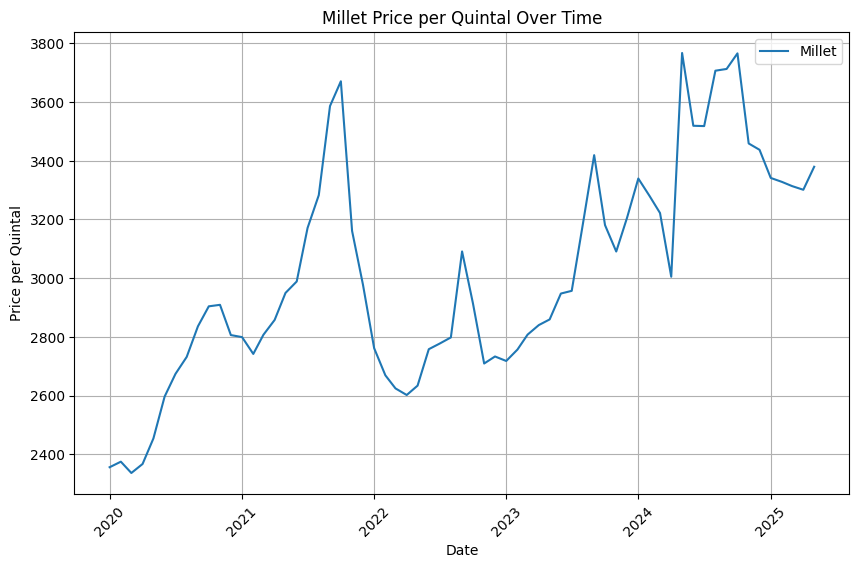

C:\Users\HP\AppData\Local\Temp\ipykernel_19752\1314607132.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_data['Date'] = pd.to_datetime(commodity_data['Year'].astype(str) + '-' + commodity_data['Month'].astype(str), format='%Y-%B')


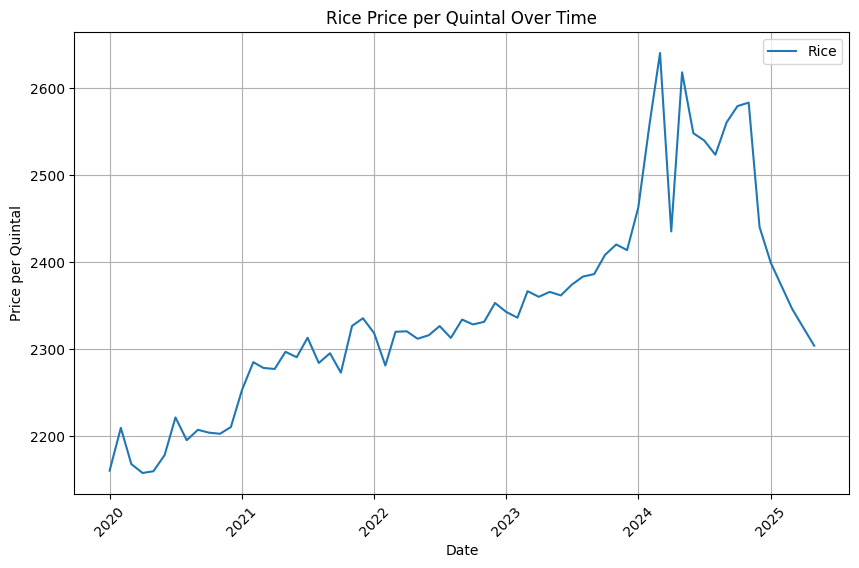

C:\Users\HP\AppData\Local\Temp\ipykernel_19752\1314607132.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_data['Date'] = pd.to_datetime(commodity_data['Year'].astype(str) + '-' + commodity_data['Month'].astype(str), format='%Y-%B')


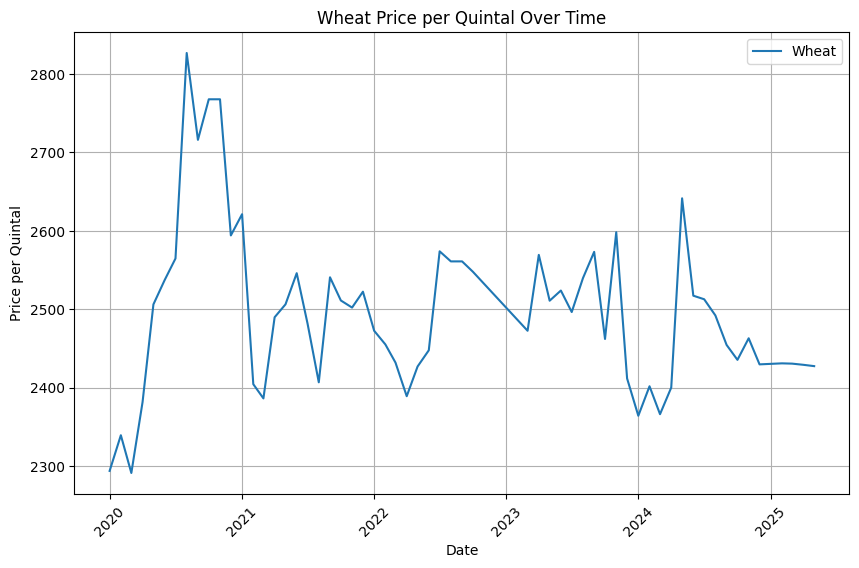

C:\Users\HP\AppData\Local\Temp\ipykernel_19752\1314607132.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_data['Date'] = pd.to_datetime(commodity_data['Year'].astype(str) + '-' + commodity_data['Month'].astype(str), format='%Y-%B')


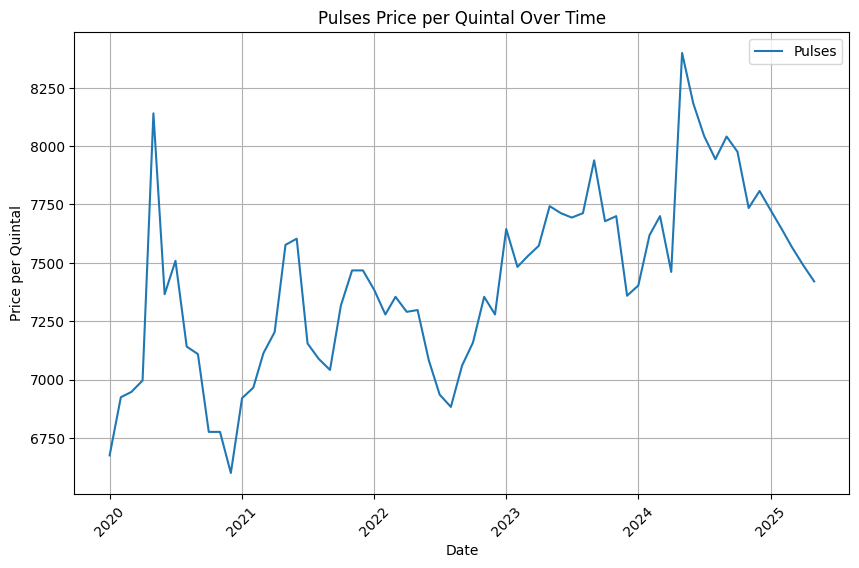

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Month is in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
recs['Month'] = pd.Categorical(recs['Month'], categories=month_order, ordered=True)

# Convert 'Price per Quintal' to numeric, force invalid entries to NaN, and drop rows with NaN 'Price per Quintal'
recs['Price per Quintal'] = pd.to_numeric(recs['Price per Quintal'], errors='coerce')
recs = recs.dropna(subset=['Price per Quintal'])

# Loop through unique commodities
unique_commodities = recs['Commodity'].unique()

for commodity in unique_commodities:
    # Filter data for the current commodity
    commodity_data = recs[recs['Commodity'] == commodity]
    
    # Convert 'Month' and 'Year' to a datetime
    commodity_data['Date'] = pd.to_datetime(commodity_data['Year'].astype(str) + '-' + commodity_data['Month'].astype(str), format='%Y-%B')
    
    # Aggregate by month and calculate the mean Price per Quintal
    commodity_data = commodity_data.groupby('Date').agg({'Price per Quintal': 'mean'}).reset_index()
    
    # Plot Price per Quintal for the commodity over time
    plt.figure(figsize=(10, 6))
    plt.plot(commodity_data['Date'], commodity_data['Price per Quintal'], label=commodity)
    plt.title(f'{commodity} Price per Quintal Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price per Quintal')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()


In [25]:
recs.to_csv('data/tab3-market_insights.csv', index=False)

In [29]:
prices.rename(columns={'N': 'Nitrogen', 'P':'Phosphorous', 'K':'Potassium', 'label':'crop recommendation'}, inplace=True)

prices

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,crop recommendation
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [30]:
prices.to_csv('data/tab1-crop_advisory.csv', index=False)

In [36]:
soil = pd.read_csv('srdb-data.csv')

soil = soil[soil['Country'] == 'India']
soil = soil[['Region','Site_name','Soil_drainage','Soil_BD','Soil_type','MAT','MAP']]
soil

C:\Users\HP\AppData\Local\Temp\ipykernel_19752\841062377.py:1: DtypeWarning: Columns (4,47) have mixed types. Specify dtype option on import or set low_memory=False.
  soil = pd.read_csv('srdb-data.csv')


,Region,Site_name,Soil_drainage,Soil_BD,Soil_type,MAT,MAP
135,NaN,Banaras Hindu U,Dry,1.35,Sandy loam,26.0,1190.0
1437,NaN,Kumaun Himalaya,Dry,NaN,Alluvial loam,22.9,1593.0
1438,NaN,Kumaun Himalaya,Dry,1.09,Alluvial loam,NaN,NaN
1439,NaN,Kumaun Himalaya,Dry,1.22,Alluvial loam,NaN,NaN
1636,NaN,Kurukshetra,Dry,NaN,Alluvial,24.5,661.0
...,...,...,...,...,...,...,...
12275,Southeast coast of India,Pichavaram mangrove wetland,Wet,NaN,Clayey,NaN,1310.0
12313,Dehradun,Forest Research Institute,Dry,NaN,NaN,25.5,2020.0
12339,Uttarakhand,Lal Tibba,Dry,NaN,"Regosols, Leptosols, dolomitic",25.0,2150.0
12731,Varanasi,Assi drain,Wet,NaN,NaN,37.5,1050.0


In [32]:
soil.columns

Index(['Record_number', 'Entry_date', 'Study_number', 'Author',
       'Duplicate_record', 'Quality_flag', 'Contributor', 'Country', 'Region',
       'Site_name', 'Site_ID', 'Study_midyear', 'YearsOfData', 'Latitude',
       'Longitude', 'Elevation', 'Manipulation', 'Manipulation_level',
       'Age_ecosystem', 'Age_disturbance', 'Species', 'Biome',
       'Ecosystem_type', 'Ecosystem_state', 'Leaf_habit', 'Stage', 'Soil_type',
       'Soil_drainage', 'Soil_BD', 'Soil_CN', 'Soil_sand', 'Soil_silt',
       'Soil_clay', 'MAT', 'MAP', 'PET', 'Study_temp', 'Study_precip',
       'Meas_method', 'Collar_height', 'Collar_depth', 'Chamber_area',
       'Time_of_day', 'Meas_interval', 'Annual_coverage', 'Partition_method',
       'Rs_annual', 'Rs_annual_err', 'Rs_interann_err', 'Rlitter_annual',
       'Ra_annual', 'Rh_annual', 'RC_annual', 'Rs_spring', 'Rs_summer',
       'Rs_autumn', 'Rs_winter', 'Rs_growingseason', 'Rs_wet', 'Rs_dry',
       'RC_seasonal', 'RC_season', 'GPP', 'ER', 'NEP', 'N

In [38]:
soil.to_csv('data/tab2-soil-health.csv',index=False)